# 1 - Perkenalan

Nama : Novanska Aginta Ganesha

Batch : RMT-019

Dataset : Customers churn

Objective : meminimalisir resiko customer untuk berhenti memakai produk dengan memprediksi customer yang akan berhenti (churn)

# 2 - Import Libraries

In [102]:
import pandas as pd
import numpy as np
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#model deployment
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [2]:
#load data
data = pd.read_csv('D:\Hacktiv8\p2---ftds-019-rmt---m1-Novanska\churn.csv')

In [3]:
#menampilkan 10 data pertama
data.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
#menampilkan 10 data terakhir
data.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
#check data duplicated.
data.duplicated().sum()

18

In [6]:
#drop data duplicate
data = data.drop_duplicates()

In [7]:
#mengubah data joining_date menjadi date time.
data['joining_date'] = pd.to_datetime(data['joining_date'])

In [8]:
#check data
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [9]:
#check info data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36992 non-null  object        
 1   age                           36992 non-null  int64         
 2   gender                        36933 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       31554 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           31599 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  object        
 11  days_since_last_login       

In [10]:
#check jumlah unique data
data.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

# 4 - EDA

In [11]:
#check data
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [12]:
#split categorical dan numerical untuk plotting.
cat_columns = data.select_dtypes(include = 'object').drop(['user_id','last_visit_time'],axis = 1).columns.tolist()
num_columns = data.select_dtypes(include = np.number).drop(['churn_risk_score'], axis = 1).columns.tolist()
cat_columns

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

## 4.1 - Categorical columns

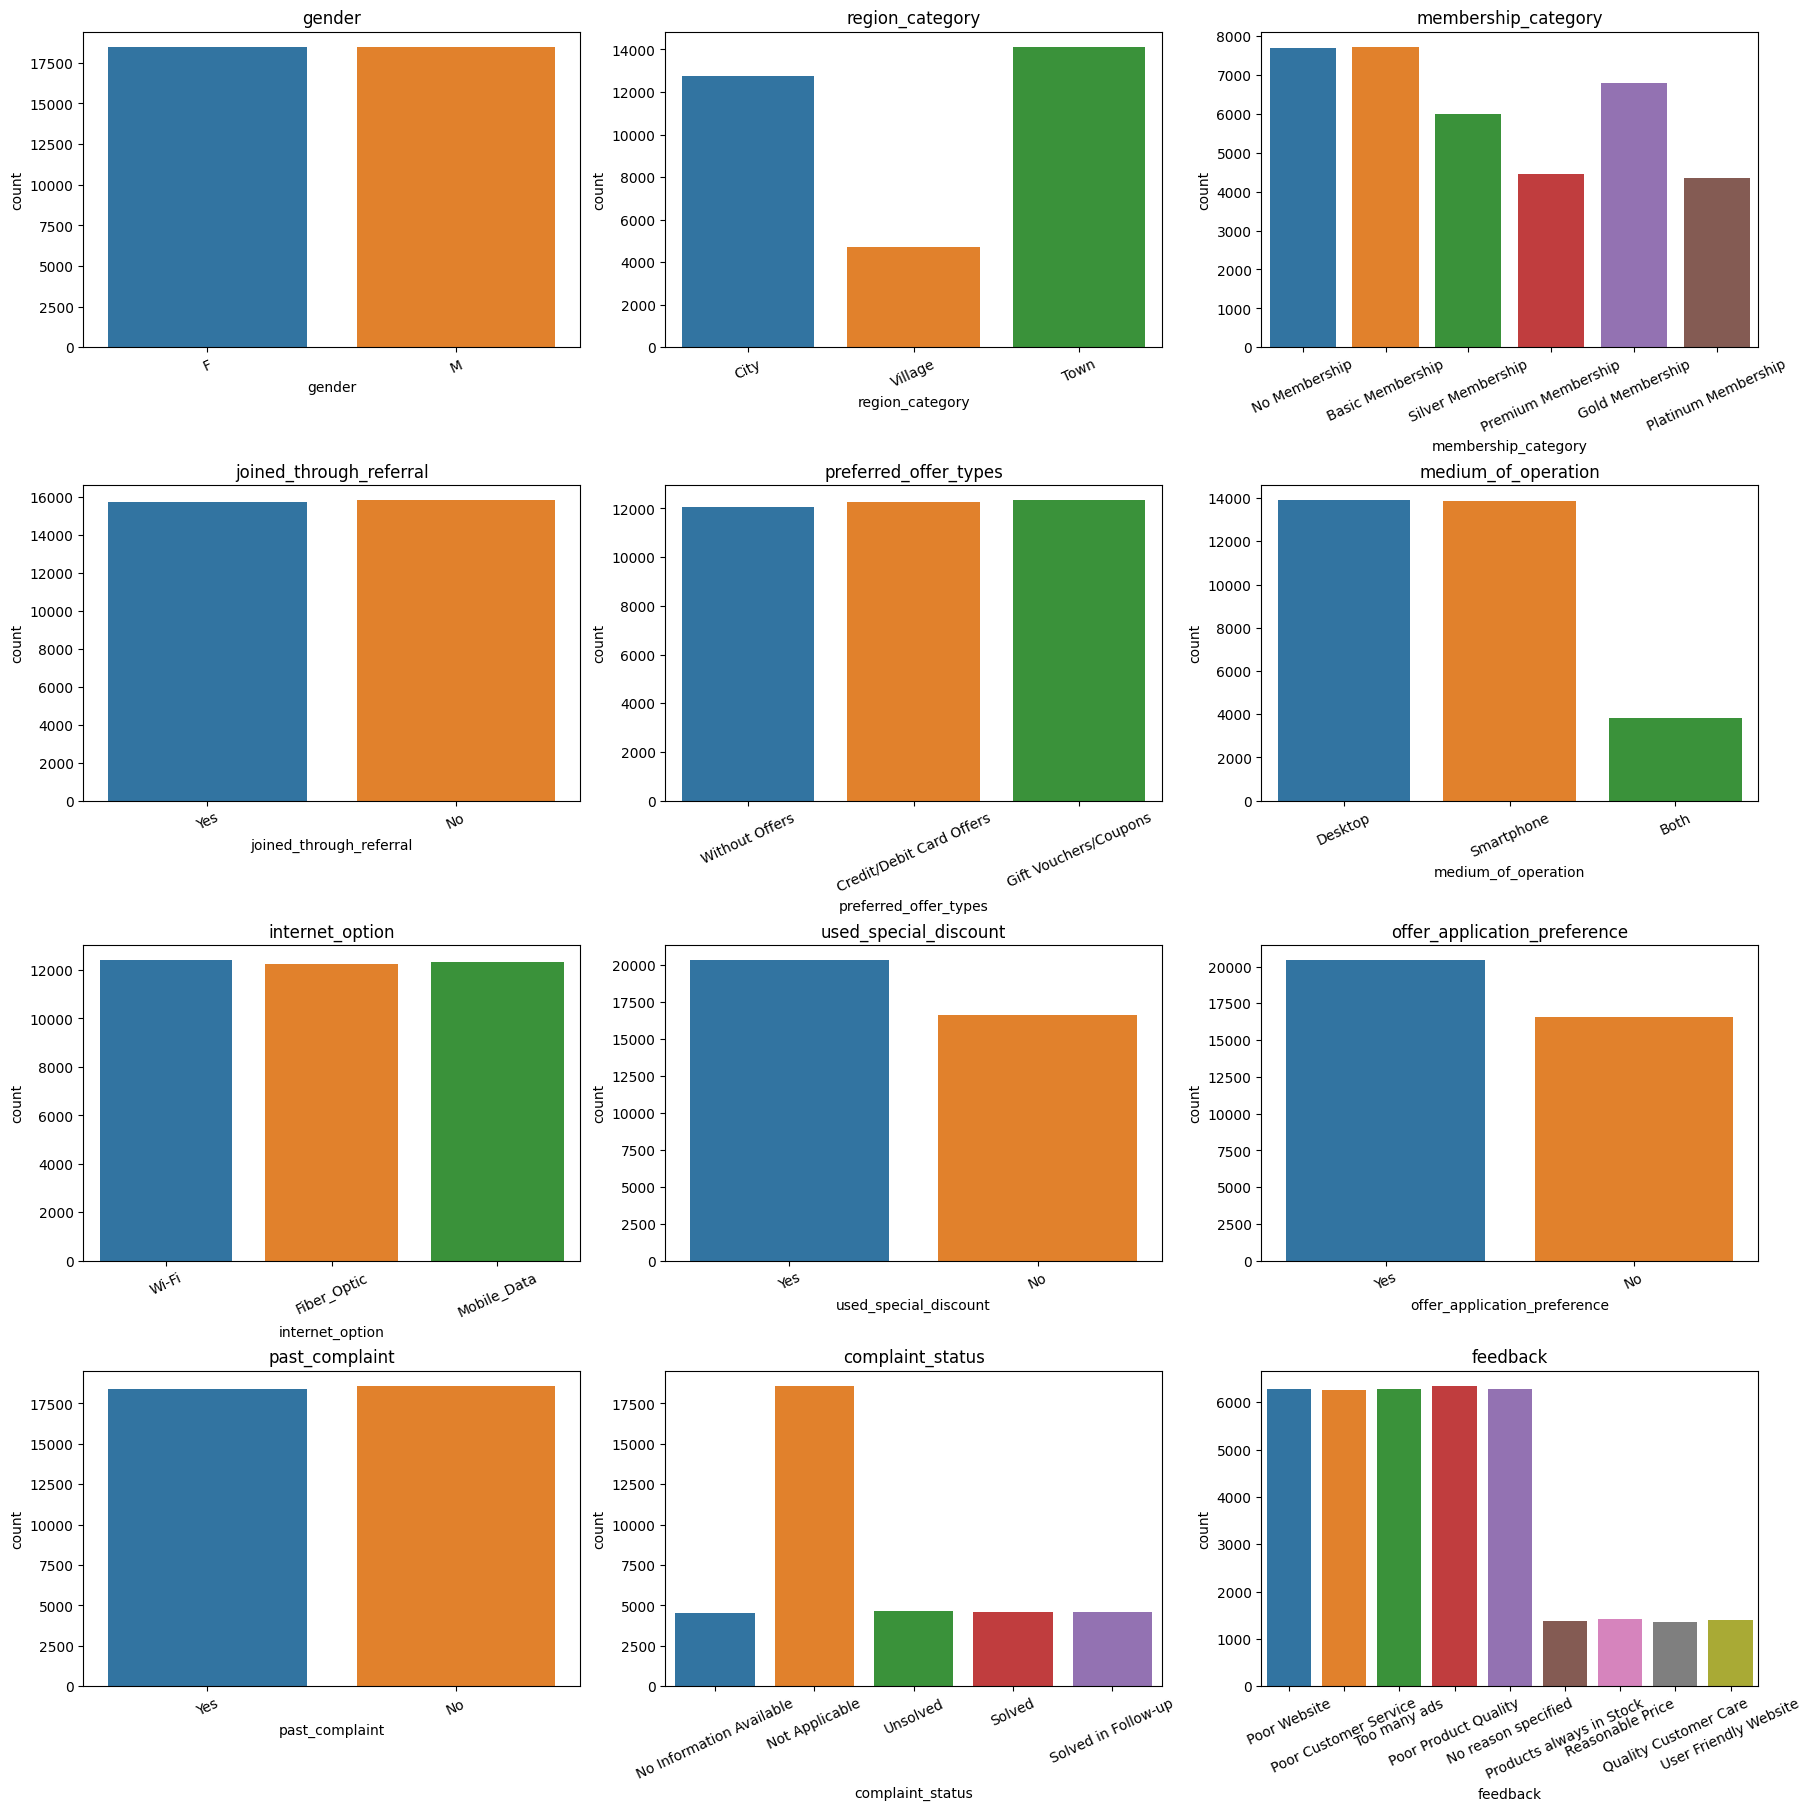

In [13]:
#plot distribusi setiap categorical columns
fig, axes = plt.subplots(4, 3, figsize=(18, 18), constrained_layout=True)
for col, ax in zip(cat_columns, axes.flat):
    sns.countplot(data = data , x = col, ax = ax)
    ax.tick_params(axis='x', rotation=25)
    ax.set_title(col)
# disable leftover axes
for ax in axes.flat[12:]: 
    ax.set_axis_off()

Insight : 

1. pada kolom gender jumlah customer lelaki maupun perempuan berjumlah sama
2. kebanyakan feedback yang diberikan yaitu  poor website, poor customer service, too many ads, and poor product quality.
3. kebanyakan complaint tidak dilaksanakan
4. kebanyakan customers tidak menjadi member atau menjadi basic member
5. kebanyakan customer menggunakan special diskon
6. kebanyakan customer menggunakan semua penawaran yang diberikan.
7. kebanyakan customer berasal dari town maupun cities.(kota)
8. rata-rata customer join menggunakan referal maupun tidak menggunakan referal.

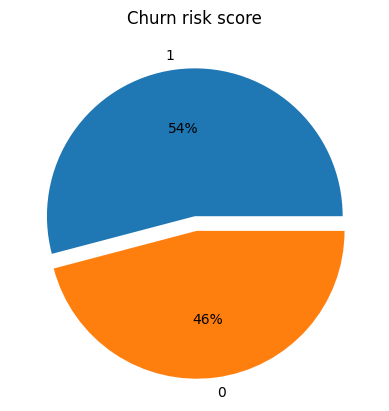

In [14]:
#check distribusi churn_risk_score
plt.pie(data['churn_risk_score'].value_counts(),labels = [1,0], autopct='%.0f%%', explode=[0,0.1])
plt.title('Churn risk score')
plt.show()

Insight :

54% customer akan berhenti menjadi pelanggan sedangkan 46% akan tetap menjadi pelanggan.

## 4.2 - Numerical Columns

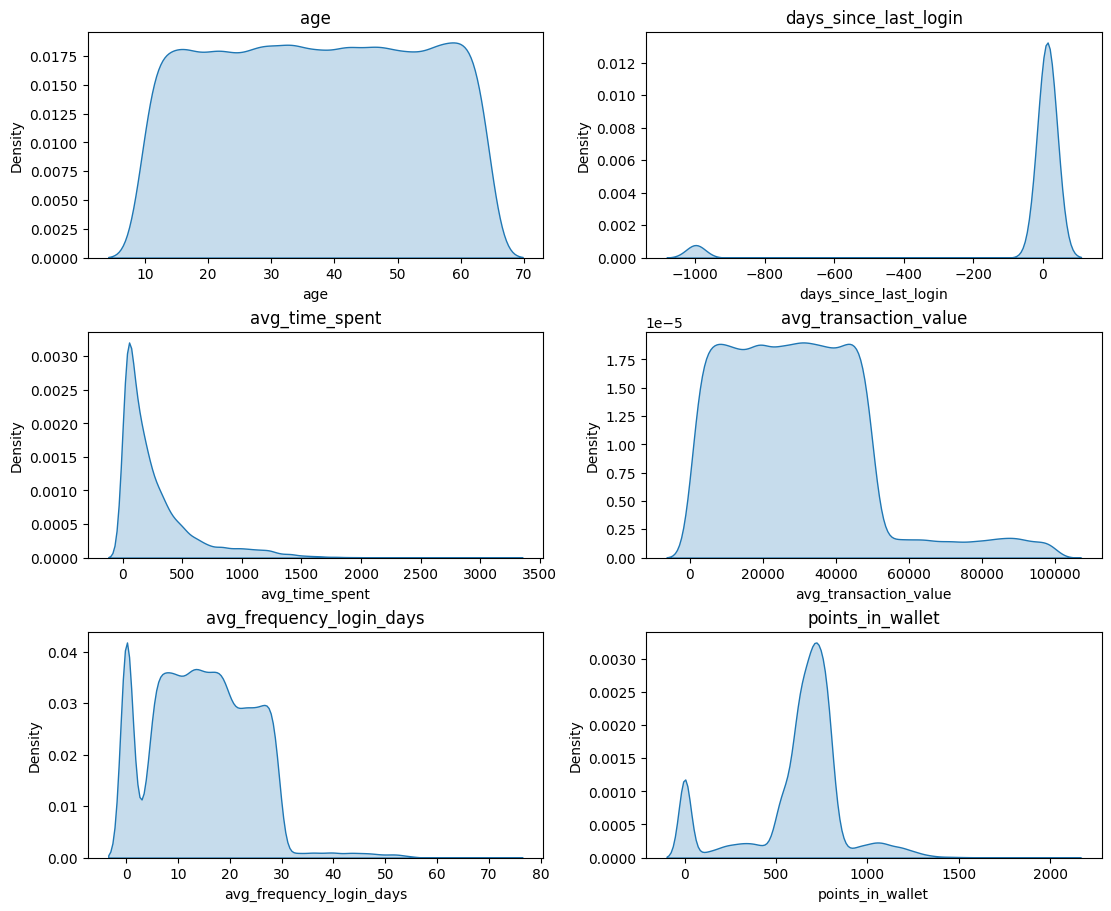

In [15]:
#plot distribusi numerical columns
fig, axes = plt.subplots(3, 2, figsize=(11, 9), constrained_layout=True)

for col, ax in zip(num_columns, axes.flat):
    sns.kdeplot(data = data, x= col, ax = ax, shade = True)
    ax.set_title(col)

Insight : 
1. Usia terdistribusi secara merata di antara para pelanggan
2. rata-rata waktu yang dihabiskan, nilai transaksi rata-rata, dan frekuensi rata-rata hari datang right skewed.

## 4.3 - Check distribusi terhadap target(churn)

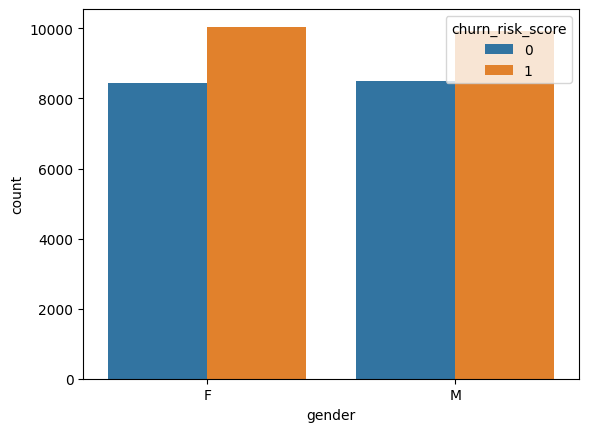

In [16]:
#check distribusi gender terhadap churn
sns.countplot(data = data, x = 'gender', hue = 'churn_risk_score')
plt.show()

In [17]:
#check rata-rata churn_risk_score pada gender 
data.groupby('gender').mean()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
gender,,,,,,,
F,37.107896,-40.299730,282.166586,29197.237932,14.697410,626.191131,0.543483
M,37.125630,-43.381337,276.310275,29346.988423,14.618886,621.042293,0.538633


Insight : 

Sepertinya gender tidak terlalu mempengaruhi dari churn_risk_score kedua gender memiliki nilai churn_risk_score yang hampir sama(saling mendekati)

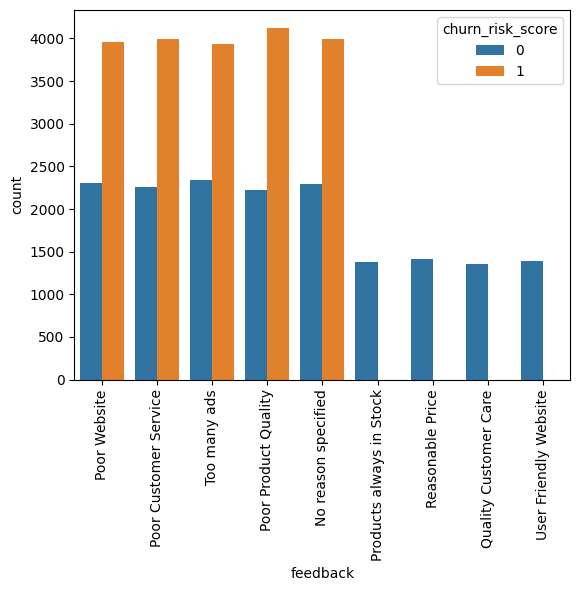

In [18]:
##check distribusi feedback terhadap churn
sns.countplot(data = data, x = 'feedback', hue = 'churn_risk_score')
plt.xticks(rotation=90)
plt.show()

In [19]:
#check rata-rata churn pada feedback
data.groupby('feedback').mean()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
feedback,,,,,,,
No reason specified,37.066773,-46.026073,272.076300,25343.421296,15.487787,608.325291,0.634976
Poor Customer Service,37.201216,-47.457774,274.611302,25686.247927,15.625715,609.640396,0.638516
Poor Product Quality,37.214016,-38.441102,274.681703,25254.595479,15.630534,607.618464,0.649921
Poor Website,37.420667,-38.326264,273.196149,25383.517158,15.581851,612.121887,0.631797
Products always in Stock,37.018090,-38.345152,317.441364,50439.067858,9.488877,694.552827,0.000000
Quality Customer Care,37.449265,-39.220588,318.344738,50508.837779,9.469610,709.653681,0.000000
Reasonable Price,36.429781,-39.963303,305.163940,51499.718271,9.382960,693.170804,0.000000
Too many ads,36.773212,-43.523650,273.016956,25403.004211,15.614861,613.089896,0.627011
User Friendly Website,37.209921,-31.373113,303.527836,52029.743918,9.230816,701.059765,0.000000


Insight : 

kebanyakan customers dengan jumlah feedback terbanyak seperti poor website,poor customer service, too many ads, poor product quality dan no reason specified akan keluar menjadi pelanggan. (dengan rata-rata churn_risk_score yang lumayan tingg)

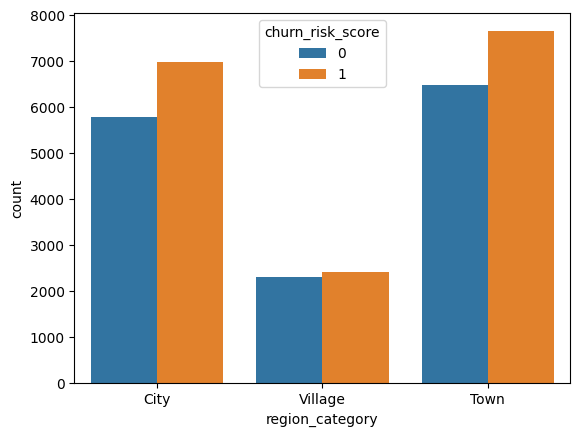

In [20]:
#check distribusi region_category terhadap churn
sns.countplot(data = data, x = 'region_category', hue = 'churn_risk_score')
plt.show()

Insight : 

rata-rata customers yang berasal dari kota kebanyakan akan keluar menjadi pelanggan, sedangkan yang berada di desa terdistribusi secara merata.

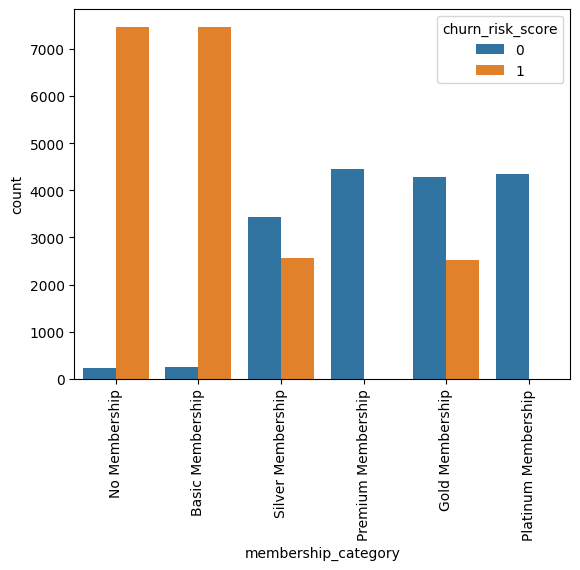

In [21]:
#check distribusi membership_category terhadap churn
sns.countplot(data = data, x = 'membership_category', hue = 'churn_risk_score')
plt.xticks(rotation=90)
plt.show()

Insight : 
1. hampir seluruh customers yang tidak menjadi membership dan basic membership memilih untuk keluar menjadi pelanggan.
2. customers dengan premium dan platinum membership memilih untuk tetap menjadi pelanggan.
3. customers dengan silver dan gold membership kebanyakan memilih untuk tetap menjadi pelanggan, sedangkan beberapa memilih untuk keluar menjadi pelanggan.

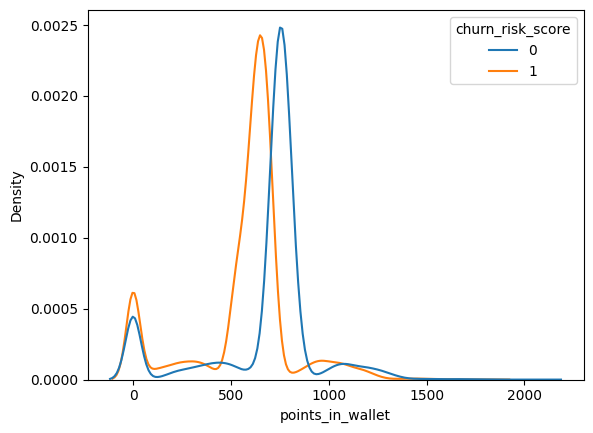

In [22]:
#check distribusi points_in_wallet terhadap churn
sns.kdeplot(data = data, x = 'points_in_wallet', hue = 'churn_risk_score')
plt.show()

In [23]:
#check rata-rata churn_risk_score pada setiap kolom numerical.
data.groupby('churn_risk_score').mean()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
churn_risk_score,,,,,,
0,37.012662,-40.368375,283.891437,33873.282446,13.490375,682.291051
1,37.207675,-43.228363,275.122219,25366.363813,15.649860,573.731712


Insight :

sebagian besar pelanggan yang pergi memiliki poin antara 500 dan 750. sementara sebagian besar pelanggan yang bertahan memiliki poin antara 600 dan 900. pada umumnya pelanggan dengan poin yang lebih banyak cenderung bertahan.

## 4.4 - Korelasi

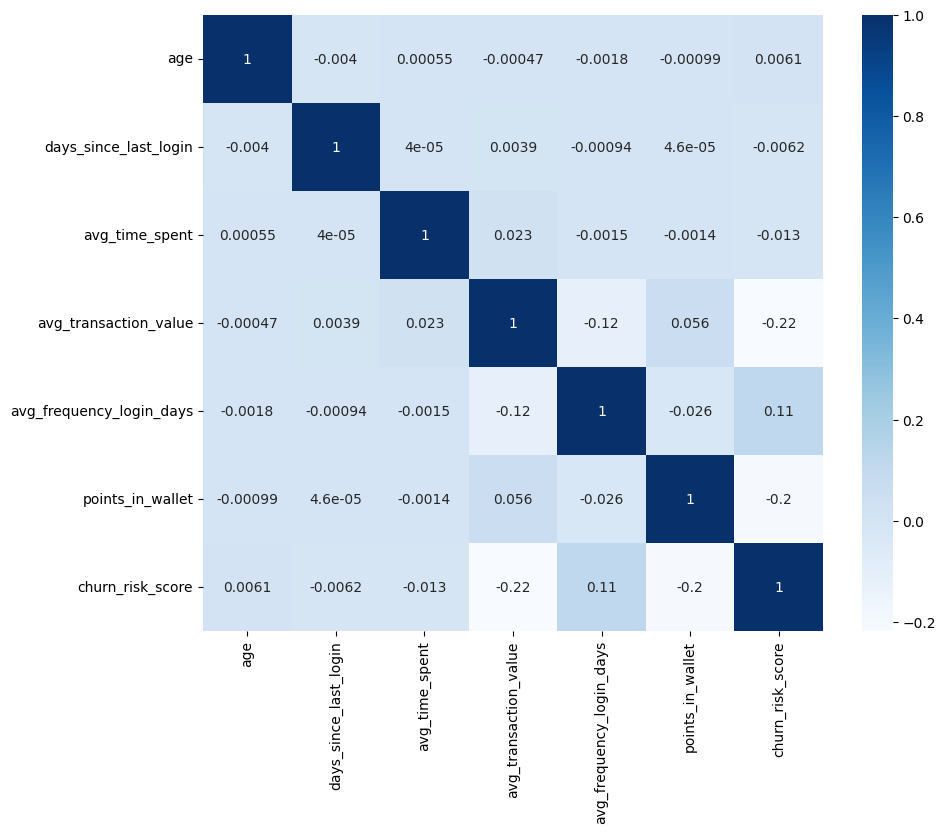

In [24]:
#check korelasi antar setiap feature.
cor = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, cmap = 'Blues', annot = True)
plt.show()

Insight :

Pada korelasi, tidak ditemukan korelasi yang tinggi antara fitur-fitur yang ada, korelasi tertinggi berada pada churn_risk_score dengan avg_transaction_value yaitu sebesar -0.22

# 5 - Feature Engineering

## 5.1 Split train-set, test-set, val-set

In [25]:
# Splitting X dan Y

X = data.drop('churn_risk_score',axis=1)
y= data['churn_risk_score']

In [26]:
#split train,test,val
X_train_val , X_test , y_train_val , y_test = train_test_split(X,y,test_size =0.15,random_state=20)
X_train,X_val , y_train,y_val = train_test_split(X_train_val,y_train_val,test_size=0.15,random_state=20)

print('Train Size : ',X_train.shape)
print('Val Size : ',X_val.shape)
print('Test Size : ',X_test.shape)

Train Size :  (26726, 21)
Val Size :  (4717, 21)
Test Size :  (5549, 21)


## 5.2 Feature Selection

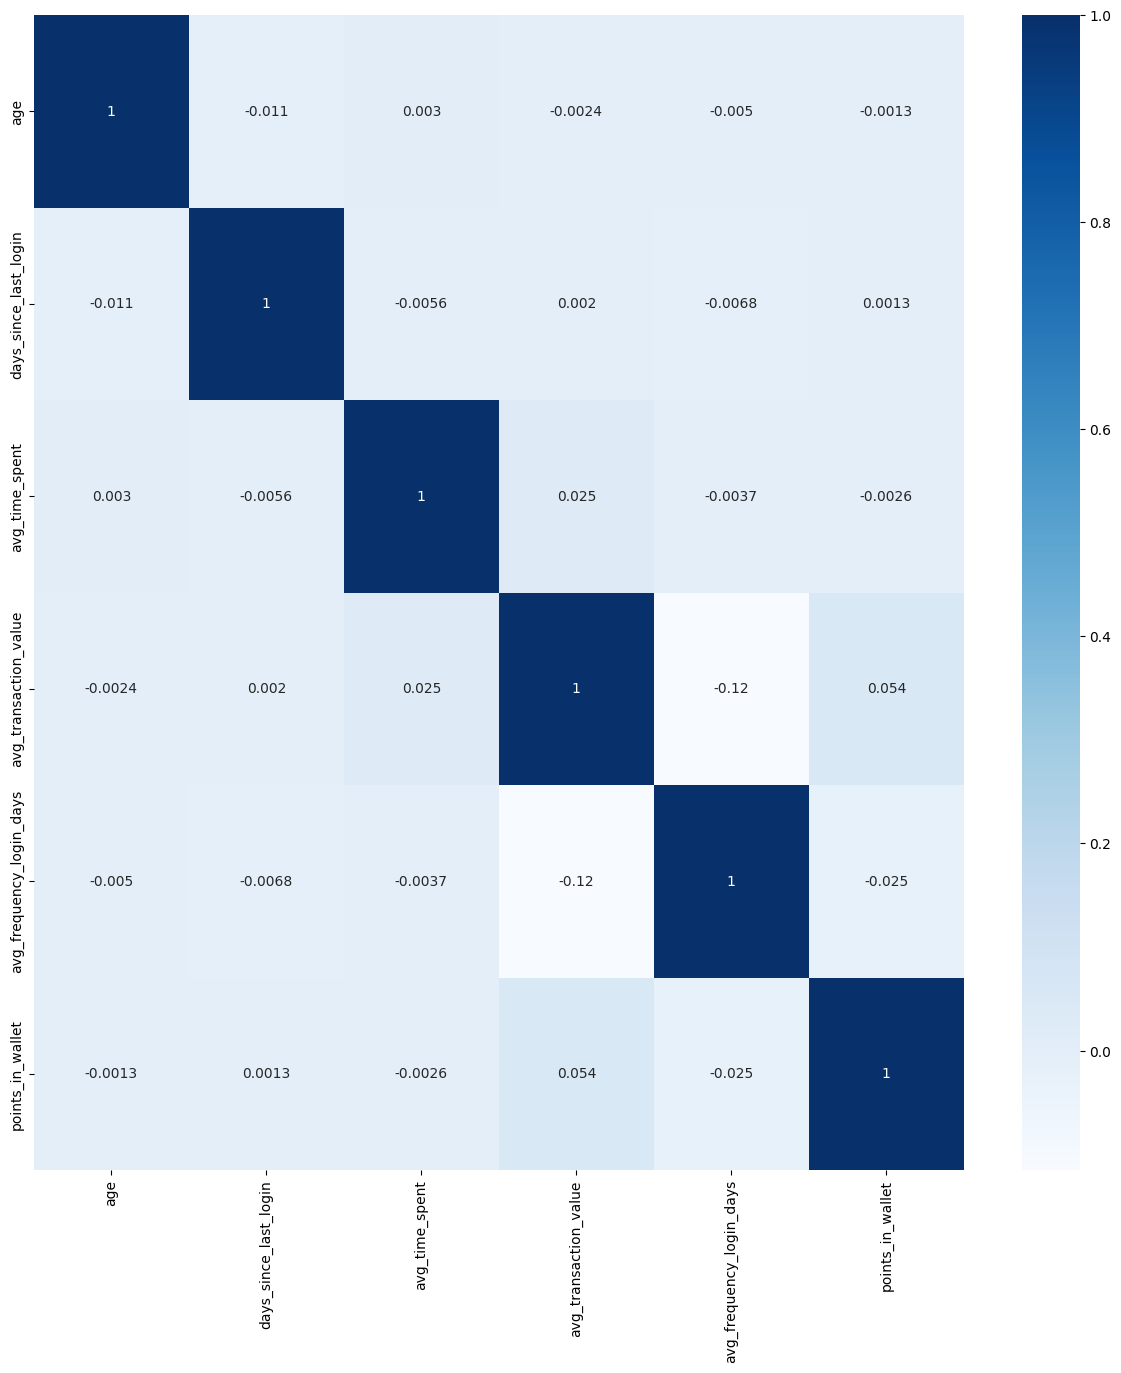

In [27]:
#check korelasi pada data train pada setiap feature
cor = X_train.corr()
plt.figure(figsize = (15,15))
sns.heatmap(cor, cmap = 'Blues', annot = True)
plt.show()

drop data yang tidak berkorelasi terhadap churn (model)

user_id tidak digunakan

internet_option tidak digunakan karena tidak berpengaruh besar terhadap churn

last_visit_time di drop dikarenakan tidak terlalu berpengaruh (tidak seperti feedback,avg_time_spent,dll)

In [28]:
#drop user_id, internet_option, dan last_visit_time
X_train.drop(['user_id','internet_option','last_visit_time'],axis=1,inplace=True)
X_test.drop(['user_id','internet_option','last_visit_time'],axis=1,inplace=True)
X_val.drop(['user_id','internet_option','last_visit_time'],axis=1,inplace=True)

In [29]:
#check data X_train setelah di drop.
X_train

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
33579,10,M,Town,Silver Membership,2015-08-19,NaN,Without Offers,Desktop,13,102.840000,30001.24,21.0,1143.169784,No,Yes,No,Not Applicable,Poor Customer Service
1786,32,M,NaN,Silver Membership,2016-07-24,No,Gift Vouchers/Coupons,Smartphone,4,38.470000,37714.51,23.0,786.260000,Yes,No,Yes,Unsolved,Poor Customer Service
28973,62,M,NaN,Basic Membership,2017-06-27,Yes,Gift Vouchers/Coupons,Smartphone,18,33.980000,40274.14,28.0,1083.317412,No,Yes,No,Not Applicable,Too many ads
20226,33,M,Town,Gold Membership,2017-05-30,Yes,Credit/Debit Card Offers,Desktop,10,74.820000,34636.34,12.0,716.970000,Yes,No,Yes,Unsolved,Poor Website
7061,26,F,NaN,Platinum Membership,2016-07-18,No,Without Offers,Smartphone,5,191.850000,19214.72,28.0,755.070000,No,Yes,No,Not Applicable,Poor Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,60,M,City,Gold Membership,2015-07-13,No,Without Offers,NaN,6,58.570000,11040.73,13.0,610.130000,Yes,No,Yes,Solved in Follow-up,No reason specified
24293,11,F,Town,Silver Membership,2017-04-17,Yes,Without Offers,Both,8,0.000000,26169.66,24.0,0.000000,No,Yes,Yes,No Information Available,Poor Product Quality
6855,18,M,Town,Platinum Membership,2016-11-03,Yes,Credit/Debit Card Offers,Smartphone,14,35.690000,12462.86,14.0,787.560000,No,Yes,Yes,Solved in Follow-up,Poor Customer Service
13839,46,M,NaN,Gold Membership,2016-01-11,Yes,Gift Vouchers/Coupons,Both,19,264.420000,47212.22,17.0,655.520000,No,Yes,No,Not Applicable,Poor Product Quality


In [30]:
# Get Numerical COlumns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ',num_columns)
print('Categorical Columns : ',cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [31]:
num_columns

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

In [32]:
cat_columns

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

## 5.3 Handling Missing Values

In [33]:
#check missing values pada X_train
X_train.isnull().sum()

age                                0
gender                            46
region_category                 3903
membership_category                0
joining_date                       0
joined_through_referral         3959
preferred_offer_types            222
medium_of_operation             3893
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [34]:
#check missing values pada X_val
X_val.isnull().sum()

age                               0
gender                            7
region_category                 702
membership_category               0
joining_date                      0
joined_through_referral         670
preferred_offer_types            34
medium_of_operation             672
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [35]:
#check missing values pada X_test
X_test.isnull().sum()

age                               0
gender                            6
region_category                 823
membership_category               0
joining_date                      0
joined_through_referral         809
preferred_offer_types            32
medium_of_operation             828
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

Insight :

terdapat 5 features yang memiliki missing values, akan dihandle nanti dengan pipeline menggunakan SimpleImputer.

## 5.3 Handling Outlier

In [37]:
#plot diagnostic untuk melihat outlier dan skewness.
def diagnostic_plots(df, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', df[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', df[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', df[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', df[variable4].skew() )
    
    plt.show()


In [38]:
#plot diagnostic untuk melihat outlier dan skewness.
def diagnostic_plots1(df, variable1, variable2):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', df[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', df[variable2].skew() )

Skewness Value of age : -0.003316526455352584
Skewness Value of days_since_last_login : -3.908220245776245
Skewness Value of avg_time_spent : 2.2869025909080323
Skewness Value of avg_frequency_login_days : 0.38734966221413847


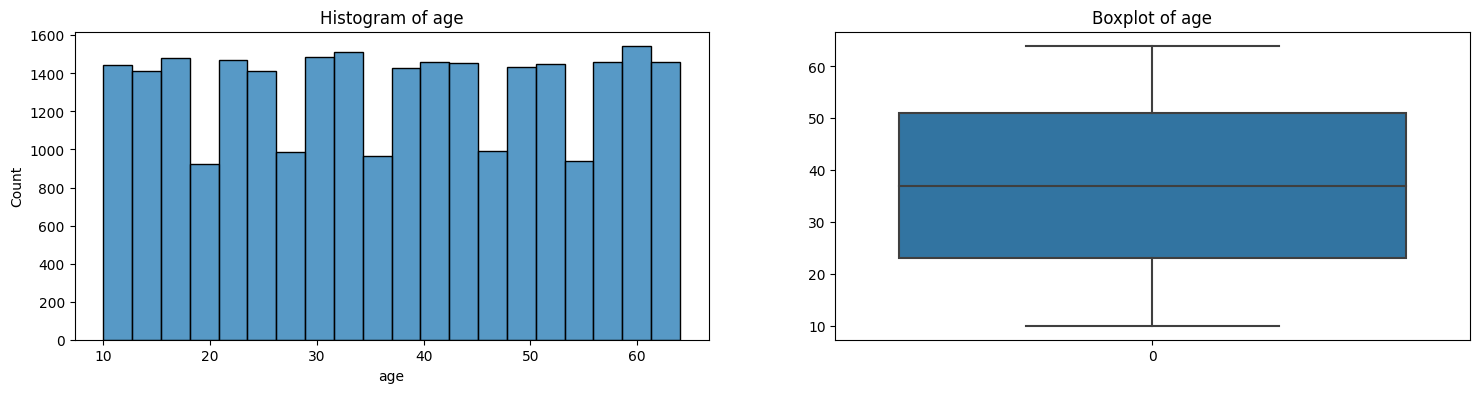

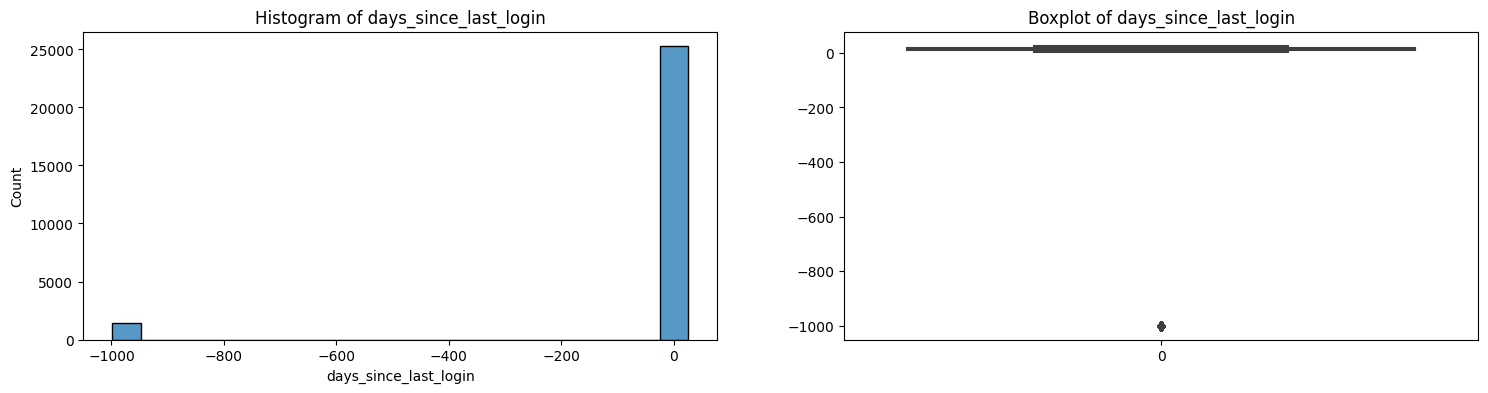

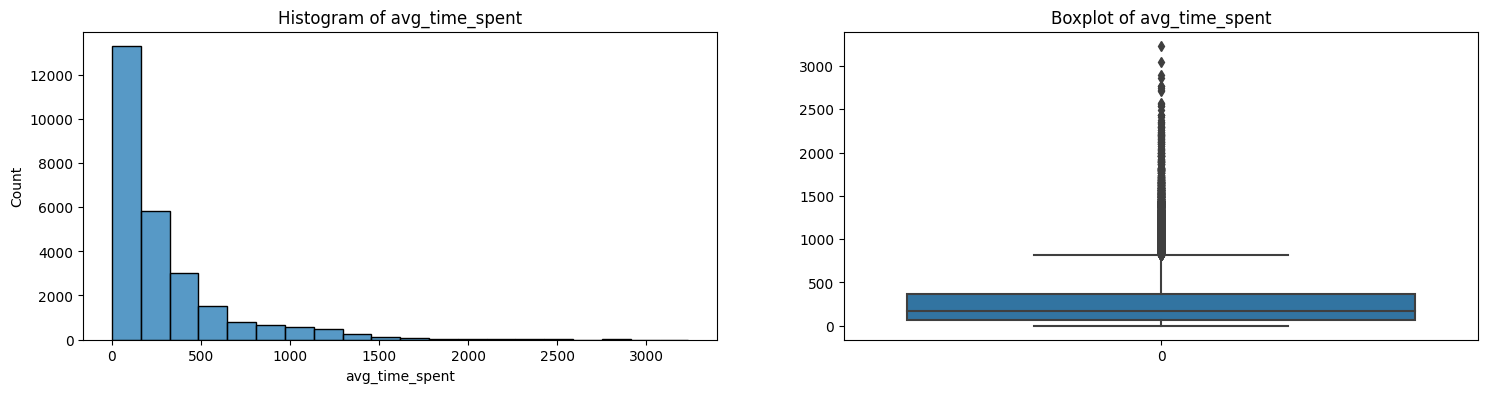

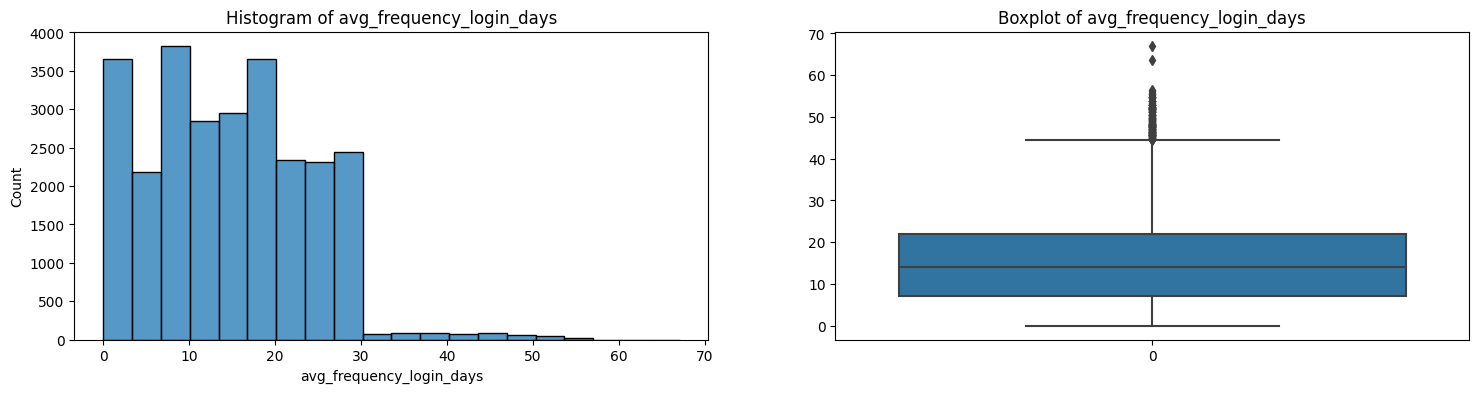

In [39]:
diagnostic_plots(X_train, 'age', 'days_since_last_login', 'avg_time_spent','avg_frequency_login_days')

Insight :

terdapat outlier yang sangat tinggi di days_since_last_login dan avg_time_spent terlalu right skewed(nilai skewed terlalu tinggi)

Skewness Value of points_in_wallet : -0.7504536012533641
Skewness Value of avg_transaction_value : 1.0156193799132316


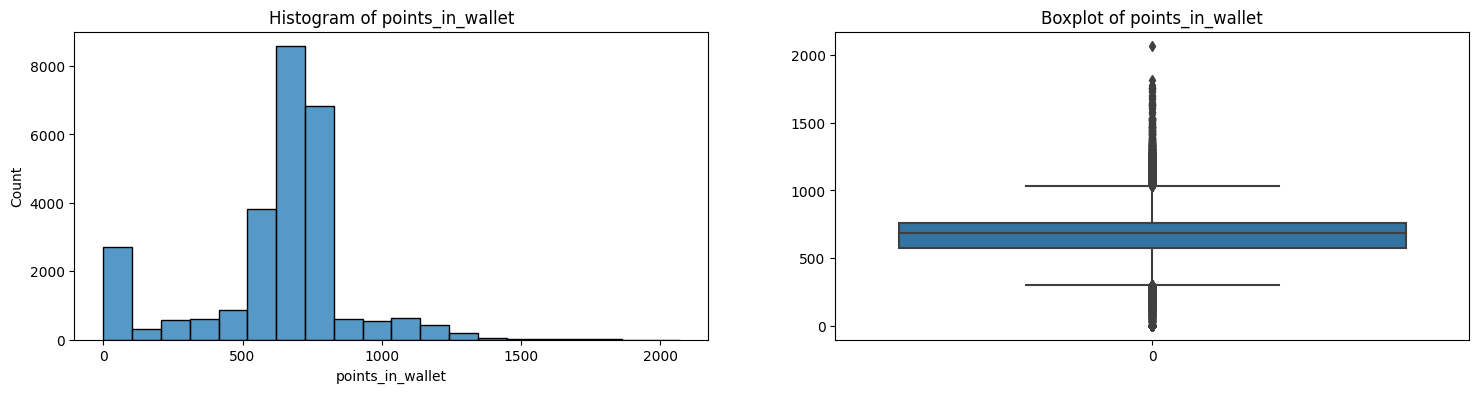

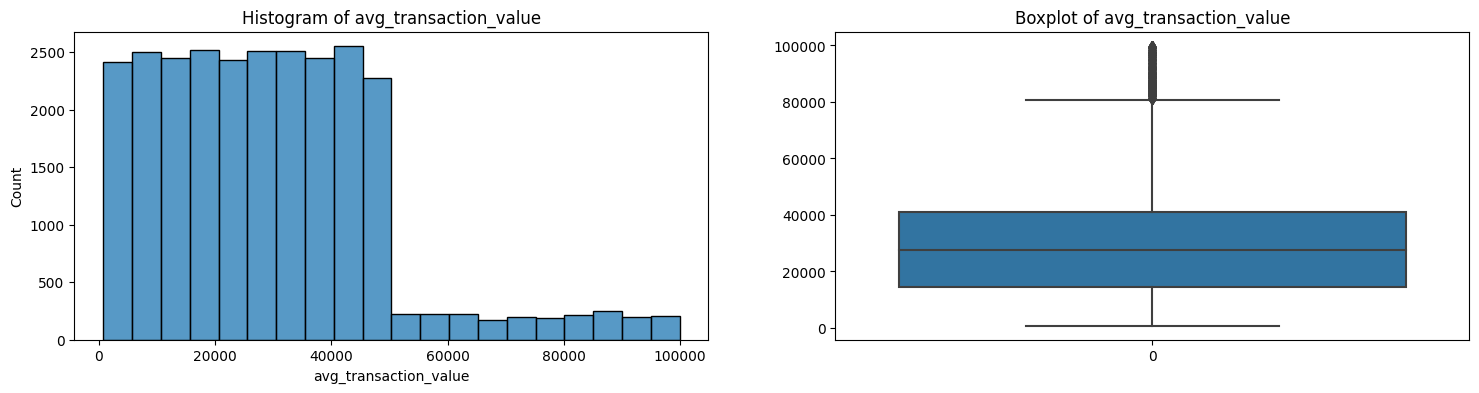

In [40]:
diagnostic_plots1(X_train, 'points_in_wallet', 'avg_transaction_value')

Insight :

terlihat bahwa avg_transaction_value terlalu right skewed (nilai skewed terlalu tinggi)

menurut personal judgment saya ada beberapa yang termasuk kedalam natural outlier

In [41]:
# Membuat capper pada data train
windsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=1.5,
                         variables=['avg_transaction_value', 'days_since_last_login', 'avg_time_spent'])

windsoriser.fit(X_train)
X_train_t = windsoriser.transform(X_train)
X_test_t = windsoriser.transform(X_test)
X_val_t = windsoriser.transform(X_val)

## 5.4 Make Pipeline

In [42]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num',num_pipeline,num_columns),
    ('pipe_cat',cat_pipeline,cat_columns)
])

In [43]:
# Fit and transform
X_train_final = final_pipeline.fit_transform(X_train_t)
X_val_final = final_pipeline.fit_transform(X_val_t)
X_test_final = final_pipeline.transform(X_test_t)

In [49]:
# Bundle preprocessing for numerical and categorical data to tensorflow before being input to the model
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).batch(70).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final,y_test)).batch(70)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).batch(70)

# 6 Sequential Model

## 6.1 Sequential API (before improvement)

Hyperparameters yang digunakan : 
1. Jumlah neuron pada input layer sama dengan jumlah kolom pada train set
2. Terdapat 4 hidden layer pada model ini, hidden layer 1 memiliki 100 neuron, hidden layer 2 memiliki 50 neuron, hidden layer 3 memiliki 25 neuron dan hidden layer 4 memiliki 12 neuron.

Fungsi Aktivasi: ReLU untuk setiap hidden layer

Inisialisasi Bobot: HeNormal untuk hidden layer 1
Regularisasi Kernel : l1 untuk hidden layer 1

Jumlah neuron pada lapisan output adalah 1 (Klasifikasi Biner)

Fungsi Aktivasi: sigmoid (Klasifikasi Biner)

Untuk Kompilasi,

loss = binary_crossentropy untuk klasifikasi biner (0 atau 1)

Pengoptimal = SGD memiliki Kualitas Konvergensi yang baik

metrik = akurasi, recall, dan presisi

In [87]:
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [88]:
# Create Sequential API
model_seq = tf.keras.models.Sequential()

# Hidden Layer 1
model_seq.add(tf.keras.layers.Dense(100, activation='relu',input_shape=(X_train_final.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l1')) 

# Hidden Layer 2
model_seq.add(tf.keras.layers.Dense(50, activation='relu'))

# Hidden Layer 3
model_seq.add(tf.keras.layers.Dense(25, activation='relu'))

# Hidden Layer 4
model_seq.add(tf.keras.layers.Dense(12, activation='relu'))

# Output Layer
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile
model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics=['Recall'])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 12)                312       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 11,750
Trainable params: 11,750
Non-trainable params: 0
_________________________________________________________________


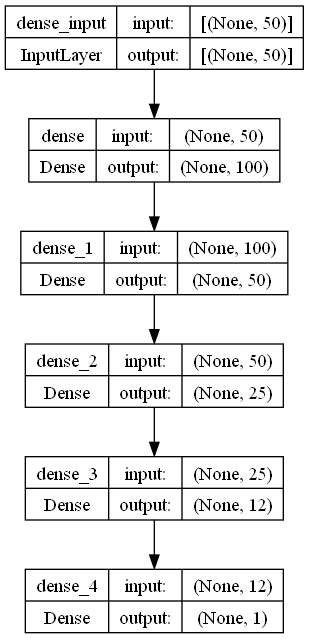

In [89]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_seq, show_shapes=True)

## 6.2 Sequential API Improvement

Pada improvement kali ini akan digunakan :
1. Hanya menggunakan 3 hidden layer, yang sebelumnya menggunakan 4 hidden layer.
2. Menggunakan optimizer adam
3. Melakukan dropout dengan rate 0.2
4. Menggunakan BatchNormalization untuk menghindari vanish (karena sebelumnya sudah dijalankan tanpa BatchNormalization terdapat vanish dilihat dari plot)

In [83]:
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_seq1 = tf.keras.models.Sequential()

# Hidden Layer 1
model_seq1.add(tf.keras.layers.Dense(100, activation='relu',input_shape=(X_train_final.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l1')) 
model_seq1.add(tf.keras.layers.Dropout(rate=0.2)) # menambahkan dropout

# Hidden Layer 2
model_seq1.add(tf.keras.layers.Dense(50, activation='relu'))
model_seq1.add(tf.keras.layers.BatchNormalization())
model_seq1.add(tf.keras.layers.Dropout(rate=0.2))

# Hidden Layer 3
model_seq1.add(tf.keras.layers.Dense(25, activation='relu'))
model_seq1.add(tf.keras.layers.BatchNormalization())
model_seq1.add(tf.keras.layers.Dropout(rate=0.2))

# Output Layer
model_seq1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#compile
model_seq1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['Recall']) # menggunakan optimizer adam
model_seq1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                        

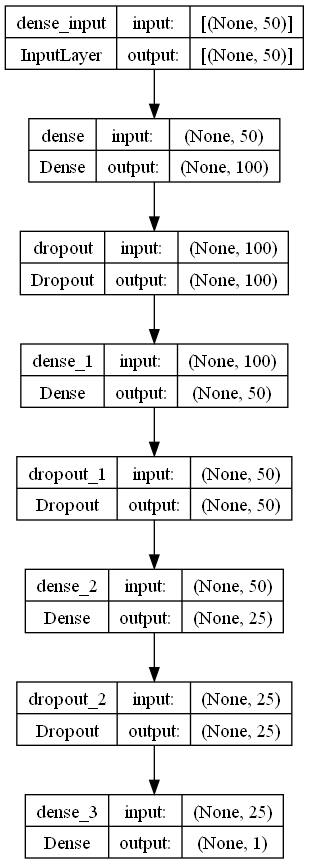

In [68]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_seq1, show_shapes=True)

## 6.3 Sequential Model Training & Evaluation

In [90]:
#menggunakan callbacks EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [91]:
%%time
# Train the Model - Sequential

history_seq=model_seq.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=[callback])

Epoch 1/250
382/382 [==============================] - 5s 5ms/step - loss: 7.9756 - recall: 0.7716 - val_loss: 7.0595 - val_recall: 0.8055
Epoch 2/250
382/382 [==============================] - 2s 4ms/step - loss: 6.1940 - recall: 0.8200 - val_loss: 5.3702 - val_recall: 0.8338
Epoch 3/250
382/382 [==============================] - 2s 4ms/step - loss: 4.6509 - recall: 0.8340 - val_loss: 4.0119 - val_recall: 0.8338
Epoch 4/250
382/382 [==============================] - 1s 4ms/step - loss: 3.4621 - recall: 0.8501 - val_loss: 2.9643 - val_recall: 0.8413
Epoch 5/250
382/382 [==============================] - 2s 4ms/step - loss: 2.5351 - recall: 0.8553 - val_loss: 2.1513 - val_recall: 0.8373
Epoch 6/250
382/382 [==============================] - 1s 4ms/step - loss: 1.8206 - recall: 0.8585 - val_loss: 1.5293 - val_recall: 0.8432
Epoch 7/250
382/382 [==============================] - 1s 4ms/step - loss: 1.2836 - recall: 0.8584 - val_loss: 1.0701 - val_recall: 0.8554
Epoch 8/250
382/382 [======

In [92]:
# Create Data Frame
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,recall,val_loss,val_recall
0,7.975614,0.771619,7.059539,0.805501
1,6.193966,0.819983,5.370193,0.833792
2,4.650906,0.833980,4.011878,0.833792
3,3.462149,0.850055,2.964300,0.841257
4,2.535098,0.855252,2.151264,0.837328
...,...,...,...,...
232,0.208642,0.941103,0.235341,0.982318
233,0.208232,0.941172,0.237725,0.983890
234,0.208161,0.941103,0.237131,0.984283
235,0.208469,0.941034,0.238112,0.984283


<Axes: >

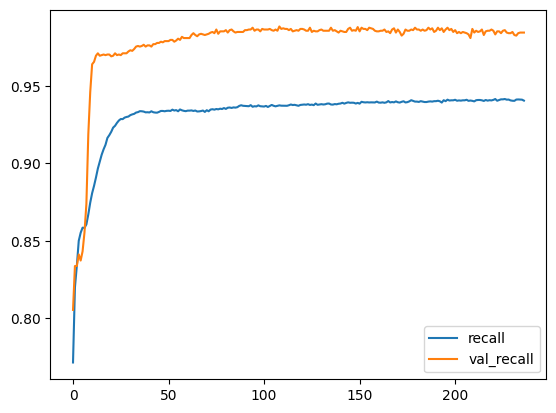

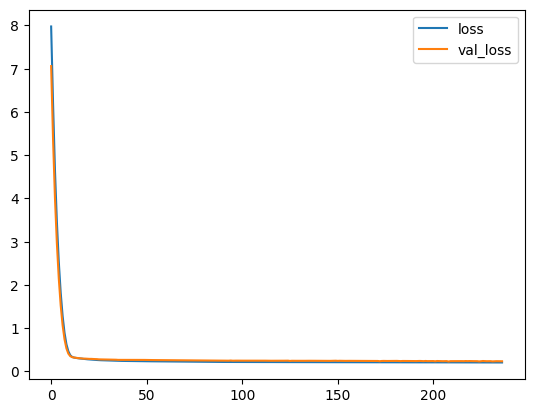

In [93]:
# Plot training results
history_seq_df[['recall','val_recall']].plot()
history_seq_df[['loss','val_loss']].plot()

Insight :

Setelah melihat data train dan validasi pada **recall** dan **loss** , kita bisa lihat kalau data ini good-fit.
Tidak ada gradien yang vanish dan explode, yang berarti hiperparameter yang kita tetapkan bekerja pada model.

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2514
           1       0.89      0.98      0.93      3035

    accuracy                           0.92      5549
   macro avg       0.93      0.92      0.92      5549
weighted avg       0.93      0.92      0.92      5549



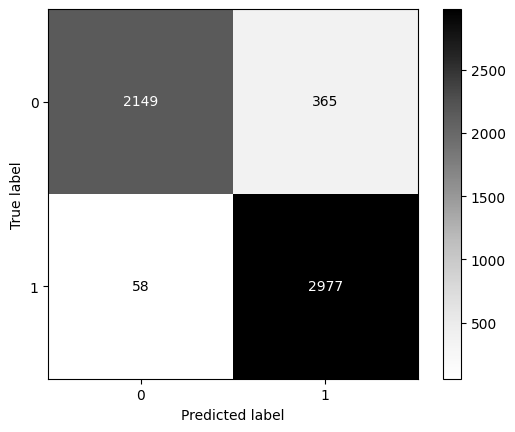

In [94]:
#classificati report terhadap X_test
y_pred_seq = model_seq.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5,1,0)

print(classification_report(y_test,y_pred_seq))

#confussion matrix
cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Berdasarkan classification report dan confusion matrix di atas, model ini sudah cukup akurat dalam memprediksi apakah nasabah berisiko churning dan tidak terlalu banyak terjadi misklasifikasi.

## 6.4 Sequential Improvement Model Training & Evaluation

In [65]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [95]:
%%time
# Train the Model - Sequential

history_seq1=model_seq1.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=[callback])

Epoch 1/250
382/382 [==============================] - 11s 8ms/step - loss: 4.1821 - recall: 0.7727 - val_loss: 1.2428 - val_recall: 0.8393
Epoch 2/250
382/382 [==============================] - 2s 5ms/step - loss: 0.6624 - recall: 0.8646 - val_loss: 0.3806 - val_recall: 0.9379
Epoch 3/250
382/382 [==============================] - 2s 5ms/step - loss: 0.3338 - recall: 0.9112 - val_loss: 0.2849 - val_recall: 0.9678
Epoch 4/250
382/382 [==============================] - 2s 5ms/step - loss: 0.2968 - recall: 0.9219 - val_loss: 0.2605 - val_recall: 0.9387
Epoch 5/250
382/382 [==============================] - 2s 5ms/step - loss: 0.2820 - recall: 0.9255 - val_loss: 0.2533 - val_recall: 0.9525
Epoch 6/250
382/382 [==============================] - 2s 5ms/step - loss: 0.2737 - recall: 0.9269 - val_loss: 0.2393 - val_recall: 0.9320
Epoch 7/250
382/382 [==============================] - 2s 5ms/step - loss: 0.2688 - recall: 0.9293 - val_loss: 0.2423 - val_recall: 0.9583
Epoch 8/250
382/382 [=====

In [96]:
# Create Data Frame
history_seq1_df = pd.DataFrame(history_seq1.history)
history_seq1_df

,loss,recall,val_loss,val_recall
0,4.182104,0.772658,1.242804,0.839293
1,0.662386,0.864606,0.380614,0.937917
2,0.333834,0.911239,0.284900,0.967780
3,0.296790,0.921910,0.260527,0.938703
4,0.281978,0.925513,0.253301,0.952456
5,0.273722,0.926899,0.239284,0.932024
6,0.268768,0.929254,0.242295,0.958350
7,0.261693,0.926829,0.243138,0.962672
8,0.257174,0.931195,0.244190,0.974067
9,0.253077,0.928423,0.228106,0.972888


<Axes: >

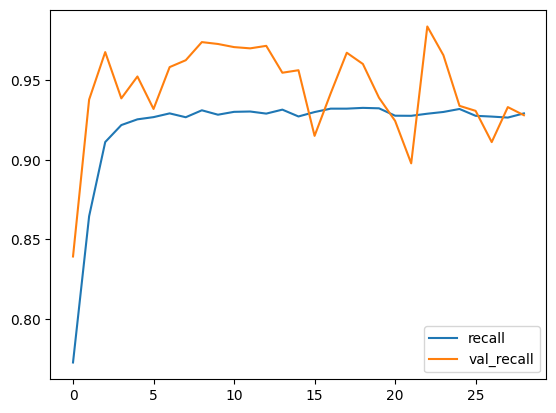

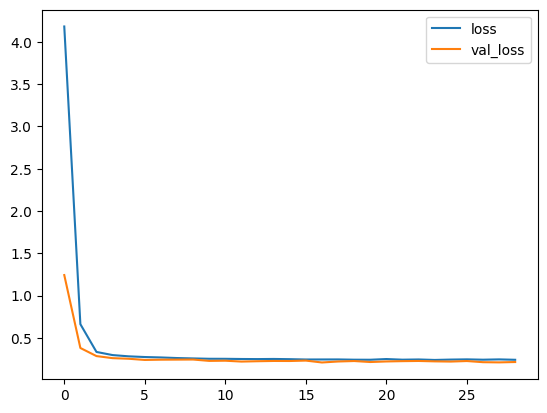

In [97]:
# Plot training results
history_seq1_df[['recall','val_recall']].plot()
history_seq1_df[['loss','val_loss']].plot()

Insight :

setelah dilakukan improvement didapatkan bahwa nilai val_loss pada model improvement lebih baik dibandingkan dengan model sebelum di improve, dan untuk model ini di lihat dari loss data tersebut tergolong good fit.

174/174 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2514
           1       0.91      0.97      0.94      3035

    accuracy                           0.93      5549
   macro avg       0.93      0.92      0.93      5549
weighted avg       0.93      0.93      0.93      5549



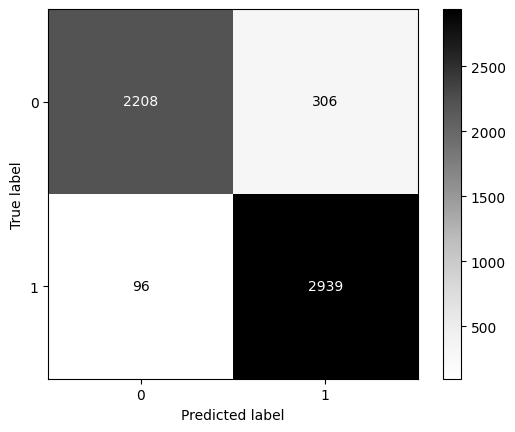

In [98]:
#classification report pada X_test
y_pred_seq1 = model_seq1.predict(X_test_final)
y_pred_seq1 = np.where(y_pred_seq1 >= 0.5,1,0)

print(classification_report(y_test,y_pred_seq1))

#confussion matrix
cm = confusion_matrix(y_test, y_pred_seq1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Berdasarkan classification report dan confusion matrix pada model improvement, model ini sudah cukup akurat dalam memprediksi apakah nasabah berisiko churning , tidak terlalu banyak terjadi misklasifikasi dan lebih baik dibandingkan model sebelum improvement

# 7 Functional Model

Hyperparameter yang digunakan pada model ini sama dengan yang digunakan pada model sequential, dengan penambahan layer input gabungan dan lapisan tersembunyi 3.

## 7.1 Functional (before improvement)

Hyperparameter yang digunakan pada model ini sama dengan yang digunakan pada model sequential, dengan penambahan concate input layer danhidden layer 3.

In [111]:
# Functional
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# input layer
input_layer = Input(shape=(X_train_final.shape[1],))

# Hidden Layer 1
hidden_layer1 = Dense(100, activation='relu')(input_layer)

# Hidden Layer 2
hidden_layer2 = Dense(50, activation='relu')(hidden_layer1)

# Hidden Layer 3
hidden_layer3 = Dense(25, activation='relu')(hidden_layer2)

# Hidden Layer 4
hidden_layer4 = Dense(12, activation='relu')(hidden_layer3)

# Concat Layer
concat_layer = concatenate([input_layer, hidden_layer4])

# Output Layer
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)
# Compile
model_functional.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics=['Recall'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          5100        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 50)           5050        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 25)           1275        ['dense_1[0][0]']                
                                                                                              

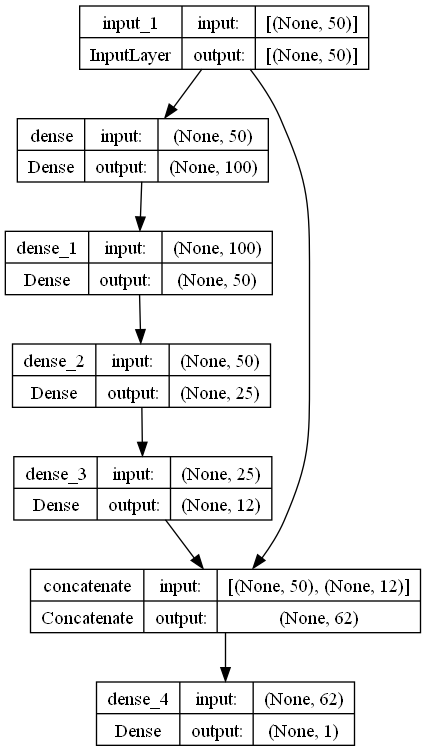

In [104]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 7.2 Functional Improvement

Untuk improvement akan dilakukan
1. Mengurangi hidden layer menjadi 3
2. Menambahkan dropout disetiap hidden layer
3. Mengganti optimizer menjadi Adam.
4. Menggunakan kernel HeNormal pada hidden layer
5. Menggunakan glorot pada output layer

In [117]:
# Functional
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# input layer
input_layer = Input(shape=(X_train_final.shape[1],))
dropout1 = Dropout(0.2)(input_layer)

# Hidden Layer 1
hidden_layer1 = Dense(100, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout1)
dropout2 = Dropout(0.2)(hidden_layer1)

# Hidden Layer 2
hidden_layer2 = Dense(50, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout2)
dropout3 = Dropout(0.2)(hidden_layer2)

# Hidden Layer 3
hidden_layer3 = Dense(25, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout3)
dropout4 = Dropout(0.2)(hidden_layer3)

# concat_layer
concat_layer = concatenate([input_layer, dropout3])

# output layer
output_layer = Dense(1,activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional1 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['Recall'])
model_functional1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 dropout (Dropout)              (None, 50)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 100)          5100        ['dropout[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 100)          0           ['dense[0][0]']                  
                                                                                              

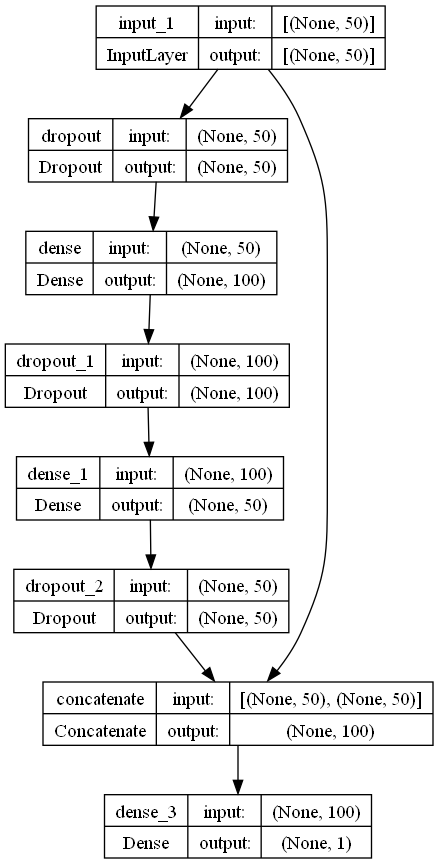

In [106]:
# plot layers
tf.keras.utils.plot_model(model_functional1,show_shapes=True)

## 7.3 Functional Model Training & Evaluation

In [112]:
#training model functional
history_func=model_functional.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=[callback])

Epoch 1/250
382/382 [==============================] - 3s 3ms/step - loss: 0.6463 - recall: 0.6807 - val_loss: 0.5714 - val_recall: 0.8212
Epoch 2/250
382/382 [==============================] - 1s 2ms/step - loss: 0.5079 - recall: 0.8425 - val_loss: 0.4630 - val_recall: 0.8629
Epoch 3/250
382/382 [==============================] - 1s 2ms/step - loss: 0.4021 - recall: 0.8489 - val_loss: 0.3588 - val_recall: 0.8361
Epoch 4/250
382/382 [==============================] - 1s 2ms/step - loss: 0.3186 - recall: 0.8368 - val_loss: 0.3019 - val_recall: 0.8263
Epoch 5/250
382/382 [==============================] - 1s 2ms/step - loss: 0.2827 - recall: 0.8485 - val_loss: 0.2823 - val_recall: 0.8401
Epoch 6/250
382/382 [==============================] - 1s 2ms/step - loss: 0.2692 - recall: 0.8609 - val_loss: 0.2746 - val_recall: 0.8491
Epoch 7/250
382/382 [==============================] - 1s 2ms/step - loss: 0.2628 - recall: 0.8688 - val_loss: 0.2708 - val_recall: 0.8585
Epoch 8/250
382/382 [======

In [113]:
# Create Data Frame
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,recall,val_loss,val_recall
0,0.646341,0.680710,0.571386,0.821218
1,0.507928,0.842503,0.463017,0.862868
2,0.402146,0.848947,0.358830,0.836149
3,0.318556,0.836821,0.301856,0.826326
4,0.282658,0.848531,0.282342,0.840079
...,...,...,...,...
178,0.106426,0.985103,0.288222,0.941847
179,0.100175,0.986904,0.282656,0.944204
180,0.107511,0.983578,0.282353,0.943026
181,0.103239,0.984687,0.281630,0.950884


<Axes: >

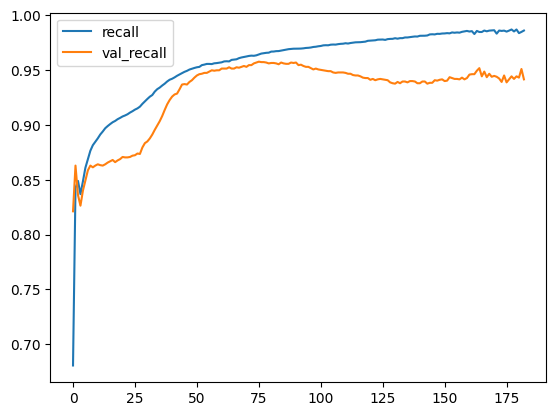

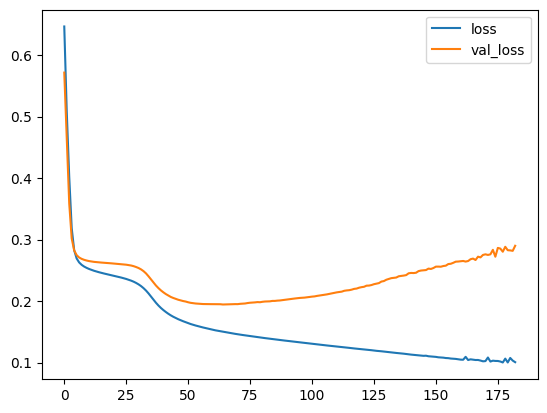

In [114]:
# Plot training results
history_func_df[['recall','val_recall']].plot()
history_func_df[['loss','val_loss']].plot()

Insight :

Pada functional model training (belum di improve) dilihat data mulai menjadi sangat over fit disaat epoch > 50

174/174 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2514
           1       0.91      0.94      0.93      3035

    accuracy                           0.92      5549
   macro avg       0.92      0.92      0.92      5549
weighted avg       0.92      0.92      0.92      5549



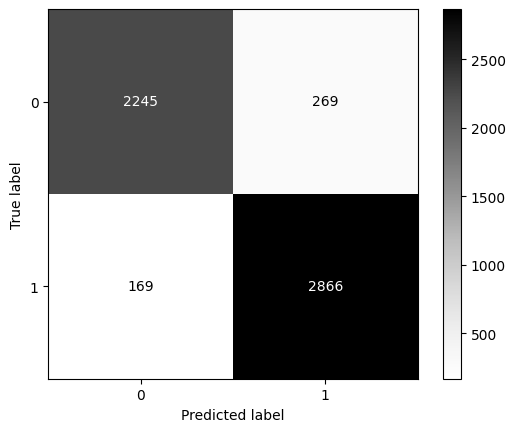

In [115]:
#classification report
y_pred_func = model_functional.predict(X_test_final)
y_pred_func = np.where(y_pred_func >= 0.5,1,0)

print(classification_report(y_test,y_pred_func))

#confussion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Insight :

Berdasarkan classification report dan confusion matrix pada model, model ini sudah cukup akurat dalam memprediksi apakah nasabah berisiko churning  dan tidak terlalu banyak terjadi misklasifikasi


## 7.4 Functional Improve Model Training & Evaluation

In [118]:
#training model functional improve
history_func1=model_functional1.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=[callback])

Epoch 1/250
382/382 [==============================] - 3s 4ms/step - loss: 0.4422 - recall: 0.7977 - val_loss: 0.2820 - val_recall: 0.9175
Epoch 2/250
382/382 [==============================] - 1s 3ms/step - loss: 0.3306 - recall: 0.8568 - val_loss: 0.2690 - val_recall: 0.9301
Epoch 3/250
382/382 [==============================] - 1s 3ms/step - loss: 0.3102 - recall: 0.8768 - val_loss: 0.2629 - val_recall: 0.9407
Epoch 4/250
382/382 [==============================] - 1s 3ms/step - loss: 0.2973 - recall: 0.8835 - val_loss: 0.2601 - val_recall: 0.9418
Epoch 5/250
382/382 [==============================] - 1s 3ms/step - loss: 0.2868 - recall: 0.8917 - val_loss: 0.2572 - val_recall: 0.9517
Epoch 6/250
382/382 [==============================] - 1s 3ms/step - loss: 0.2796 - recall: 0.8975 - val_loss: 0.2534 - val_recall: 0.9473
Epoch 7/250
382/382 [==============================] - 1s 3ms/step - loss: 0.2705 - recall: 0.9008 - val_loss: 0.2465 - val_recall: 0.9411
Epoch 8/250
382/382 [======

In [119]:
# Create Data Frame
history_func_df1 = pd.DataFrame(history_func1.history)
history_func_df1

,loss,recall,val_loss,val_recall
0,0.442238,0.797672,0.282050,0.917485
1,0.330588,0.856777,0.268999,0.930059
2,0.310187,0.876802,0.262922,0.940668
3,0.297342,0.883523,0.260135,0.941847
4,0.286755,0.891699,0.257210,0.951670
5,0.279638,0.897450,0.253364,0.947348
6,0.270527,0.900776,0.246506,0.941061
7,0.262627,0.910685,0.240737,0.944597
8,0.255259,0.918307,0.233436,0.954813
9,0.247048,0.928631,0.224833,0.957564


<Axes: >

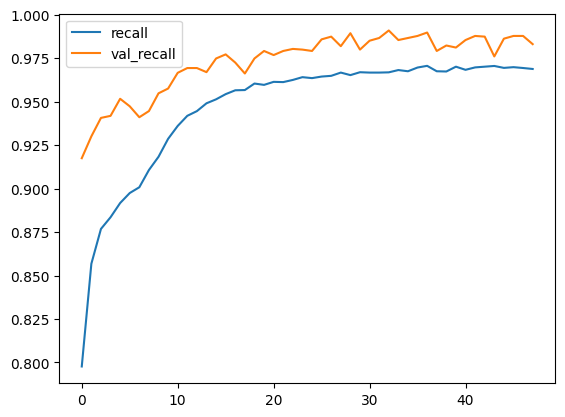

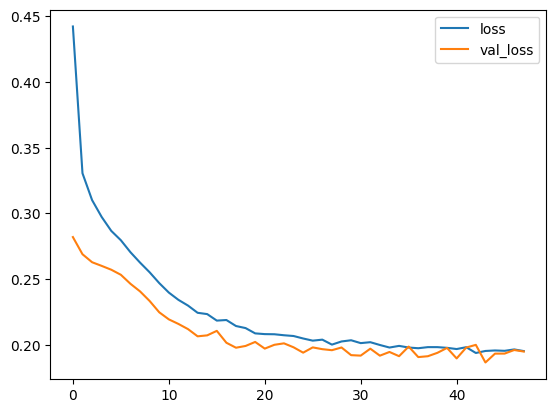

In [120]:
# Plot training results
history_func_df1[['recall','val_recall']].plot()
history_func_df1[['loss','val_loss']].plot()

Insight :

Dilihat dari loss terlihat setelah epoch berhenti di 47 model mulai menjadi good-fit.

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2514
           1       0.88      0.99      0.93      3035

    accuracy                           0.92      5549
   macro avg       0.93      0.91      0.92      5549
weighted avg       0.93      0.92      0.92      5549



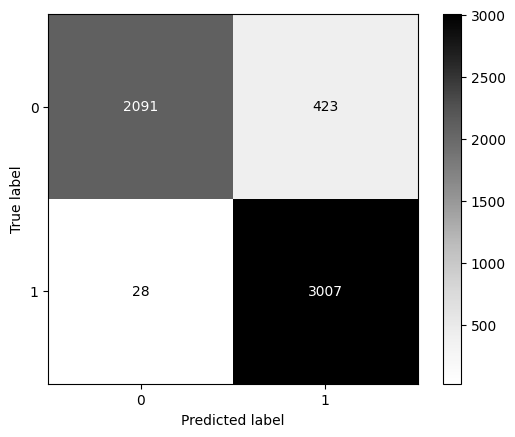

In [121]:
y_pred_func1 = model_functional1.predict(X_test_final)
y_pred_func1 = np.where(y_pred_func1 >= 0.5,1,0)

print(classification_report(y_test,y_pred_func1))

#confussion matrix
cm = confusion_matrix(y_test, y_pred_func1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Insight :

Jika dilihat dari confussion matrix dan classification report, terlihat bahwa model ini sudah cukup akurat dalam memprediksi apakah nasabah berisiko churning , tidak terlalu banyak terjadi misklasifikasi dan jika dibandingkan dengan model sebelumnya (tanpa improvement) model ini sangatlah lebih baik karena sudah tergolong goodfit.

# 8. Model Saving

In [125]:
# Save Pipeline

import pickle

with open('final_pipeline.pkl','wb') as file_1:
  pickle.dump(final_pipeline,file_1)



In [123]:
# Freeze Model

model_seq1.trainable = False
model_seq1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                        

In [127]:
model_seq.trainable = False
model_functional.trainable = False
model_functional1.trainable = False

In [128]:
model_seq.save('model_seq.h5')
model_functional.save('model_func.h5')
model_functional1.save('model_func1.h5')

In [124]:
model_seq1.save('model_seq1.h5')